In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

kiva = pd.read_csv("kiva_total.csv")
kiva.head()
kiva.drop([1787], inplace=True)
kiva[['loan_id', 'size']].sort_index(by='size')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,loan_id,size
260,1194,100
1601,14908,200
355,1554,200
874,5296,300
1615,15127,300
2414,18276,300
872,5292,400
1501,13796,450
1609,15005,500
1605,14943,500


In [12]:
kiva['trustee_new'] = [0 if x == "Borrowers Network " else 1 for x in kiva.trustee]
X = kiva[['size', 'trustee_new','conversations', 'invited_lenders', 'term']]
X = X.fillna(0)

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [14]:
km.labels_

array([2, 0, 0, ..., 0, 1, 2], dtype=int32)

In [15]:
X['cluster'] = km.labels_
X.sort('cluster')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,size,trustee_new,conversations,invited_lenders,term,cluster
989,5000,1,3.0,14,24,0
1149,5000,1,22.0,11,24,0
1145,5000,1,39.0,22,24,0
1144,4200,1,17.0,17,24,0
1143,5000,1,9.0,0,24,0
1140,5000,1,14.0,25,24,0
2131,5000,0,17.0,18,24,0
1138,5000,1,1.0,22,24,0
1137,5000,1,3.0,24,24,0
1135,5000,1,4.0,0,24,0


In [16]:
X.groupby('cluster').mean()

,size,trustee_new,conversations,invited_lenders,term
cluster,,,,,
0,4990.205092,0.770863,24.439887,14.562942,23.374116
1,9860.800000,0.770000,18.528000,21.840000,34.792000
2,2157.600000,0.670000,15.848000,9.070000,18.686000


In [17]:
centers = X.groupby('cluster').mean()
centers

,size,trustee_new,conversations,invited_lenders,term
cluster,,,,,
0,4990.205092,0.770863,24.439887,14.562942,23.374116
1,9860.800000,0.770000,18.528000,21.840000,34.792000
2,2157.600000,0.670000,15.848000,9.070000,18.686000


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

print X['size'].shape
print X['conversations'].shape


(2414,)
(2414,)


ValueError: x and y must be the same size

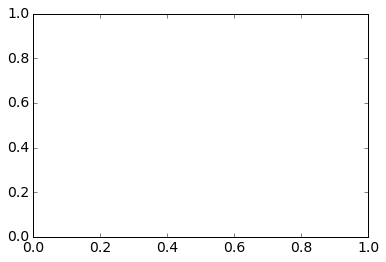

In [22]:
plt.scatter(X.size, X.conversations, c=colors[list(X.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.size, centers.conversations, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')